# Tensorflow: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

This is a clever example.

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


Now to import the data.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's take a look at one of the images

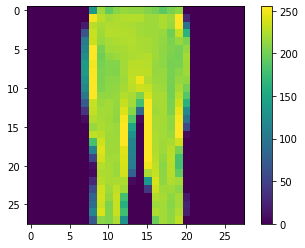

Trouser


In [13]:
plt.figure()
plt.imshow(train_images[54321])
plt.colorbar()
plt.grid(False)
plt.show()

print(class_names[train_labels[54321]])

Now we need to rescale the image data to (0,1).

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let's display 25 images to make sure we're good here.

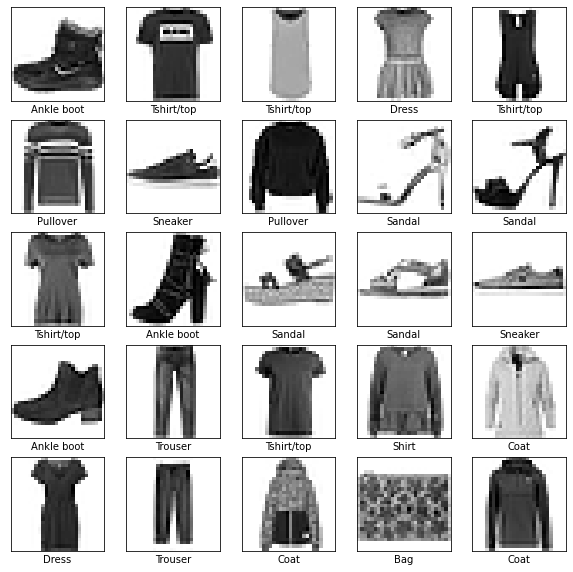

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Looking good!  Let's work on a model.

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Now we need to *compile* the model; this is where we add a loss function, an optimizer, and note which metrics we want to track.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we fit the model.

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.4961 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.3764 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.3382 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.3123 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.2958 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.2805 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.2677 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.2577 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.2465 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 2s 806u